In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
# plt.style.use('classic')
rc('font', family='serif')
rc('figure', facecolor='w')
from astropy.io import fits, ascii
from astropy.table import Table
import os

from astropy import units as u
from astropy.coordinates import SkyCoord
# import TheCannon
import apogee_tools as ap
AP_PATH = os.environ['APOGEE_DATA']

/home/jess/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
file = 'data_files/mann_raw.txt'
with open(file) as f:
    content = [line for line in f]     

FileNotFoundError: [Errno 2] No such file or directory: 'data_files/mann_raw.txt'

In [32]:
ra = [float(c[28:37]) for c in content] 
dec = [float(c[38:47]) for c in content]
teff = [float(c[65:69]) for c in content]
e_teff = [float(c[70:72]) for c in content]
fe_h = [float(c[101:106]) for c in content]
e_fe_h = [float(c[107:111]) for c in content]
spt = [c[112:118].strip() for c in content]

In [34]:
dic = {'RA':ra, 'DEC':dec, 'TEFF':teff, 'E_TEFF':e_teff, 'FE_H':fe_h, 'E_FE_H':e_fe_h, 'SPT':spt}
df = pd.DataFrame(data=dic)
df.to_csv('data_files/mann_select_par.csv')

In [44]:
all_star = fits.open(AP_PATH + '/allStar-l31c.2.fits')
all_star_data = all_star[1].data

ERROR! Session/line number was not unique in database. History logging moved to new session 195


In [47]:
data_dict = {'ID':all_star_data['APOGEE_ID'], 'RA':all_star_data['RA'], 'DEC':all_star_data['DEC'], \
            'J':all_star_data['J'], 'H':all_star_data['H'], 'K':all_star_data['K'], \
            'SNR':all_star_data['SNR'], 'TEFF':all_star_data['TEFF'], 'LOGG':all_star_data['LOGG'], \
            'M_H':all_star_data['M_H']}

In [50]:
t = Table(list(data_dict.values()), names=tuple(data_dict.keys()))
t.write('data_files/allStar_params.fits', format='fits')

In [4]:
for ap_id in list(sample['ID']):
    ap.download(ap_id, type='aspcap', dir=AP_PATH+'/cannon_sets/mann_sample/')

['2M00182256+4401222'] [1]
2M00182256+4401222 not found in APOGEE main survey. 

['2M02001278+1303112'] [1]
2M02001278+1303112 not found in APOGEE main survey. 

['2M03553688+5214291'] [4151]
['2M05312734-0340356'] [1]
2M05312734-0340356 not found in APOGEE main survey. 

['2M05413073+5329239'] [1]
2M05413073+5329239 not found in APOGEE main survey. 

['2M06000351+0242236'] [1]
2M06000351+0242236 not found in APOGEE main survey. 

['2M06544902+3316058'] [1]
2M06544902+3316058 not found in APOGEE main survey. 

['2M08103429-1348514'] [4295]
['2M08524084+2818589'] [1]
2M08524084+2818589 not found in APOGEE main survey. 

['2M09142298+5241125'] [1]
2M09142298+5241125 not found in APOGEE main survey. 

['2M10112218+4927153'] [1]
2M10112218+4927153 not found in APOGEE main survey. 

['2M10121768-0344441'] [1]
2M10121768-0344441 not found in APOGEE main survey. 

['2M10193634+1952122'] [1]
2M10193634+1952122 not found in APOGEE main survey. 

['2M10285555+0050275'] [1]
2M10285555+0050275 not

In [7]:
prop = pd.read_csv('samples/APOGEE_DR15_proposed.csv')
coord = list(prop['COORD'])

In [27]:
ra, dec = [], []
for c in coord:
    rd = SkyCoord(c, unit=(u.hourangle, u.deg))
    ra.append(rd.ra.deg)
    dec.append(rd.dec.deg)

In [30]:
coord_dict = {'ID':prop['ID'], 'RA':ra, 'DEC':dec}
df = pd.DataFrame(data=coord_dict)
df.to_csv('samples/APOGEE_DR15_proposed.csv')

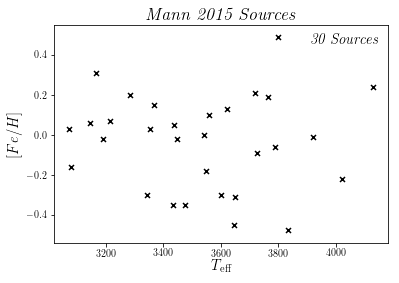

In [3]:
rfile = 'train_ref/mann_ref_labels.csv'  
tr_label = ap.loadLabels(rfile, lbl_names=['TEFF', 'FE_H', 'SNR'])

plt.figure(figsize=[6,4])
plt.scatter(tr_label.T[0], tr_label.T[1], marker='x', s=25, color='k')
# plt.scatter(tr_label.T[0], tr_label.T[1], marker='x', s=25, c=tr_label.T[2], cmap='viridis')
plt.text(4150,.46, r'$\textit{30 Sources}$', ha='right', fontsize=15)
plt.xlabel(r'$T_{\rm eff}$', fontsize=15)
plt.ylabel(r'$[Fe/H]$', fontsize=15)
plt.title(r'\textit{Mann 2015 Sources}', fontsize=18)
# plt.colorbar()
plt.show()
plt.close()

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[13,5])
# ax1.hist(tr_label.T[0], fill=False)
# # ax1.text(4150,4.85, r'\textit{30 Sources}', ha='right', fontsize=15)
# ax1.set_xlabel(r'$T_{\rm eff}$', fontsize=15)
# ax1.set_ylabel(r'$N \, Sources$', fontsize=15)

# ax2.hist(tr_label.T[1], fill=False)
# ax2.text(.51,5.81, r'$\textit{30 Sources}$', ha='right', fontsize=15)
# ax2.set_xlabel(r'$[Fe/H]$', fontsize=15)
# plt.show()

In [1]:
rfile = 'train_ref/west_ref_labels.csv'  
tr_label = ap.loadLabels(rfile, lbl_names=['SPT'])

plt.figure(figsize=[6,4])
plt.hist(tr_label.T[0], fill=False)
plt.text(9.2,11.6, r'\textit{51 Sources}', ha='right', fontsize=15)
plt.xlabel(r'$SPT$', fontsize=15)
plt.ylabel(r'$N \, Sources$', fontsize=15)
plt.title(r'\textit{West 2011 Sources}', fontsize=18)
plt.show()

NameError: name 'ap' is not defined

In [17]:
len(tr_label.T[0])

51